# Введение

<strong>Цель:</strong>
обучить VLM (Vision Language Answering) отвечать на вопросы по графикам(Chart Question Answering).

<strong>Ожидаемый результат:</strong> ipynb-файл с решением и всеми выводами ячеек, csv-файл с предсказаниями модели, залитый в репозиторий на github.

Данный блокнот описывает этапы выбора модели для решения задачи, последовательные выводы для результатов работы, а также источники данных, которые помогали приводить различные выводы.

Выбранная модель будет обучаться локального, без использования облачных серверов, по типу:

* Kaggle

* Google Colab

Потому что мое железо немного имеет преимущество перед бесплатными сервисами:

* NVIDIA GeForce RTX 4080 SUPER

* AMD Ryzen 7 7700 8-Core Processor

* 31.1 GB RAM

________

### 1. Теоретическое описание VLM (Visual Language Model) моделей, а также выбор существующей модели для поставленной задачи

#### 1.1 Строение VLM (Visual Language Model) моделей

Считаю, что перед тем, как выбирать модель, стоит вынести описание строения VLM моделей на первый план.

<strong>Краткое описание:</strong> 

Visual Language Models — это модели, которые обучаются на больших кластерах парных данных, пары которых состоят из 
картинки и подписи к ней. Помимо этого, в таких моделях появляется механизм "внимания\контекста", который позволяет фокусироваться на важных частях изображения и текста.


<strong>Расширенное описание:</strong>

Первыми этапами будут кодировки входных данных в численное представление, так как математические модели умеют работать исключительно с чиселками.

1. <strong>Image Encoder</strong> - на данном этапе кодируется изображение в виде векторного представления. Пример, которым можно закодировать изображение в вектор чаще всего являются глубокие CNN (Convolution Neural Network - пример ResNet), либо использование более сложной архитектуры трансформера (Пример - ViT).

2. <strong>Text Encoder</strong> - на данном этапе кодируется текст в векторное представление. Чаще всего путем использования трансформера (Пример - BERT/GPT).

3. <strong>Cross-Modal Alignment</strong> - мы получаем две разные по модальности сущности: картинка и текст, дабы продолжить одновременную работу с двумя сущностями их необходимо сравнять в общем векторном пространстве воспользоваться для такой задачи можно contrastive learning, данное обучение позволит минимизировать расстояние между связанными парами: текст-изображение.

4. <strong>Fusion Layer</strong> - в данном слои мы получаем слияние двух векторных представлений в одно. Такое слияние можно получить путем обычной конкатенации, или использую нейронные сети на основе attention(внимание). Беря в учет разные задачи использования VLM моделей бывают разные подходы при слиянии признаков:

* Late Fusion - при данном слияние признаки обрабатываются отдельно друг от друга и уже в конце происходит слияние.

* Early Fusion - данное слияние соединяет два признака перед обработкой, и они обрабатывается вместе.

* Cross-attention Fusion - данное слияние выборочно уделяет внимание релевантным признакам и информирует их.

5. <strong>Decoder</strong> - последним этапом является декодирование ответа для представления его в виде текста. Чаще всего для этого используются трансформеры.

<strong>Пример типичной архитектуры VLM:</strong>

<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/blog/vlm/vlm-structure.png" height=250> 

<strong>Промежуточный слой между Cross-Modal Alignment и Text Decoder:</strong>

<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/blog/vlm/proj.jpg" height=250>


#### 1.2 Обучение VLM (Visual Language Models) моделей

Как у типичных моделей машинного обучения этапы обучения схожи, кроме этапов, где применяется специфичность архитектура моделей VLM, а именно на этапах: Cross-Modal Alignment и обучение модели (так как набор данных состоит из пар). В остальном этапы обучения являются дочерними.

1. <strong>Сбор данных</strong> - собираются большие наборы данных, содержащие изображения и соответствующие текстовые описания. Примером могут послужить COCO или Flickr30k.

2. <strong>Предобработка данных</strong> - изображения и текст очищаются и подготавливаются. Тексты могут токенизироваться, а изображения нормализоваться.

3. <strong>Архитектура модели</strong> - выбирается архитектура модели, которая может включать в себя компоненты, такие как сверточные нейронные сети (CNN) для обработки изображений и трансформеры для получения векторных представлений текста/картинок.

4. <strong>Совмещение модальностей</strong> - на данном этапе происходит alignment (выравнивание) текста и картинок, то есть минимизация расстояние между векторами в векторном пространстве. Это может быть достигнуто с помощью механизмов внимания или совместного представления.

5. <strong>Обучение модели</strong> - на данном этапе начинается обучение модели относительно поставленной задачи. Задачи в свою очередь делятся на:

* Создание подписей к изображениям.

* Визуальные ответы на вопросы (Visual Question Answering, VQA).

* Генерация изображений на основе текстовых описаний.

* Поиск изображений и текстов.

* Мультимодальное создание контента.

* Также VLM-модели используются в робототехнике.

6. <strong>Финальная настройка (Fine-tuning)</strong> - после первичного обучения модель может проходить дообучение на более специализированных данных для улучшения производительности в конкретных задачах.

7. <strong>Оценка модели</strong> - Производится оценка модели на тестовых данных с использованием различных метрик, таких как точность, полнота, F1-мера и др.

8. <strong>Оптимизация</strong> - на основе результатов оценки модель может быть оптимизирована, например, с помощью настройки гиперпараметров или изменения архитектуры.

9. <strong>Инференс</strong> - после успешного обучения модель готова к применению в той задаче, для которой она обучалась (задачи перечислены в пункте 5).

10. <strong>Мониторинг и обновление</strong> - после развертывания модель может продолжать обучаться на новых данных для поддержания актуальности и улучшения качества.

<strong>VLM модели имеют два варианты использования:</strong>

1. <strong>Pre-trained</strong> - вариант использования из коробки, то есть берем пред обученную модель и сразу ее развертываем для использования.

2. <strong>Fine-tuning</strong> - вариант дообучения модели (Transfer learning), при котором берется обученная модель и до обучается на необходимых данных для реализации какой-либо задачи.

###### Источники:

###### <a href="https://www.geeksforgeeks.org/vision-language-models-vlms-explained/">Vision Language Models (VLMs) Explained - GeeksForGeeks</a>
###### <a href="https://huggingface.co/blog/vlms">Vision Language Models Explained - Hugging Face</a>
###### <a href="https://www.ultralytics.com/ru/blog/understanding-vision-language-models-and-their-applications">Понимание языковых моделей зрения и их применение - Ultralytics</a>
###### <a href="https://aman.ai/primers/ai/VLM/">Primers • Overview of Vision-Language Models - Aman.ai</a>

____

#### 1.3 Выбор существующей VLM модели для решения задачи

Ниже буду перечислены модели, между которыми происходил выбор.

1.3.1 <a href="https://github.com/vision-cair/minigpt-4">MiniGPT-4</a> - <i style="color: red;">REJECTED</i>.

- <strong>Количество и качество релевантных данных при претрейне:</strong>

На <a href="https://paperswithcode.com/paper/minigpt-4-enhancing-vision-language#:~:text=Visual%20Reasoning-,Datasets,-Edit">сайте</a> указано, что при претрейне модели участвовало 10 датасетов. Ниже описана их релевантность для текущей задачи.

1. <strong>GQA</strong> - данный сет в основном сосредоточен на вопросах по изображениям, он также предоставляет опыт в генерации вопросов и ответов, что может быть полезно для понимания вопросов, связанных с графиками. <a href="https://www.larksuite.com/en_us/topics/ai-glossary/grouped-query-attention-gqa">Источник</a>

    * <strong>Качество релевантности</strong> - очень высокое.

2. <strong>Conceptual Captions</strong> - этот набор данных помогает в генерации описаний для изображений, что может быть полезно для понимания контекста графиков и диаграмм. <a href="https://github.com/google-research-datasets/conceptual-captions">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

3. <strong>MM-Vet</strong> - датасет комплексных вопрос по изображениям, он также сможет повлиять на правильность ответов на вопросы по графикам. <a href="https://habr.com/ru/companies/airi/articles/775108/">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

4. <strong>LAION-400M</strong> - the world`s largest набор изображений с метаданными, может помочь в создании контекстуальных представлений, но не фокусируется на графиках. <a href="https://clickhouse-docs.vercel.app/docs/en/getting-started/example-datasets/laion">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

5. <strong>A-OKVQA</strong> - это набор данных для визуального ответа на вопросы, который требует использования внешнего знания помимо информации в изображениях, что может хорошо поспособствовать ответам на трудные вопросы и в контексте нашей задачи вопросы чаще всего являются трудными. <a href="https://okvqa.allenai.org/">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

6. <strong>Localized Narratives</strong> - полезен для создания более детальных описаний контекста, что может помочь в интерпретации данных на графиках. Данный датасет создавался путем: "Аннотировщики наводили курсор на каждый объект на фотографии и описывали его своими словами". <a href="https://siliconangle.com/2020/02/26/google-boosts-open-images-dataset-localized-narratives-advance-ai/">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

7. <strong>MVBench</strong> - это комплексный бенчмарк для понимания видео. Он был создан, чтобы оценить возможности понимания мультимодальных больших языковых моделей, в контексте нашей задачи релевантность может варьироваться от контекста данных. <a href="https://paperswithcode.com/dataset/mvbench">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

8. <strong>SBU / SBU-Refine</strong> - может быть полезен для генерации текстовых описаний, но фокус на графиках может быть недостаточным. <a href="https://paperswithcode.com/dataset/sbu">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

9. <strong>InfiMM-Eval</strong> - хорош для оценки мультимодальных систем, может быть полезен для понимания их работы в контексте ответов на вопросы по графикам. <a href="https://paperswithcode.com/dataset/core-mm">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

10. <strong>BenchLMM</strong> - оценка мультимодальных моделей, может помочь в определении сильных и слабых сторон нашей модели в контексте chart question answering. <a href="https://hf.rst.im/datasets/AIFEG/BenchLMM/blob/main/README.md">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

- <strong>Размер модели:</strong>

В информации на главной странице модели указано, что MiniGPT-4 имеет 3 Pre-trained checkpoints:

* <strong>MiniGPT-4 (Vicuna 13B)</strong> - чекпоинт модели Vicuna имеющий 13 миллиардов весов.

* <strong>MiniGPT-4 (Vicuna 7B)</strong> - чекпоинт модели Vicuna имеющий 7 миллиардов весов.

* <strong>MiniGPT-4 (LLaMA-2 Chat 7B)</strong> - чекпоинт модели LLaMA-2 Chat имеющий 7 миллиардов весов.

Тем самым вес модели может варьироваться от 7B до 13B весов в зависимости от выбора чекпоинта. Запуск модели локально занимает от 23G до 11.5G GPU <a href="https://github.com/vision-cair/minigpt-4?tab=readme-ov-file#:~:text=To%20save-,GPU%20memory,-%2C%20LLMs%20loads%20as">тем самым требуют достаточно мощного железа.</a>.

- <strong>Простота в дообучение:</strong>

После ознакомления с требованиям к hardware (данную информацию можно посмотреть в пункте "Размер модели") было принято решение, что данная модель не будет рассматриваться под поставленную задачу, потому что имеет достаточно большой вес с некоторым количеством бесполезных сетов на претрейне, тем самым данная модель не подходит под вариант локального обучения(локальное обучение обоснованно в пункте "Введение"). 

- <strong>Оценка простоты квантизации и инференса модели:</strong>

1.2 <strong>Квантизация модели</strong> - поскольку модель разработана с использованием pytorch, который имеет встроенные инструменты для квантизации, такие как <a href="https://pytorch.org/tutorials/recipes/recipes/dynamic_quantization.html">dynamic quantization</a>, <a href="https://www.devbookmarks.com/p/pytorch-answer-static-quantization-tutorial">static quantization</a>, <a href="https://www.devbookmarks.com/p/pytorch-answer-quantization-aware-training">quantization-aware training</a>.
Простота динамической квантизации может быть легко выполнена относительно легко для текстовой части модели. Однако сложности могут появиться с визуальной частью, поскольку сложность квантизации может зависеть от специфики слоев. 

Источник - <a href="https://huggingface.co/docs/optimum/concept_guides/quantization">Quantization - Hugging Face</a>

1.3 <strong>Инференс модели</strong> - по скольку модель разработана с использованием pytorch, для оптимизации инференса можно использовать GPU с использование <a href="https://pytorch.org/docs/stable/jit.html">TorchScript</a>. Но при этом модель потребляет достаточное количество GPU тем самым инференс может быть затруднен для развертывания на слабом железе или вовсе невозможен.

## Вывод:

### <i style="color: red;">The model was rejected cuz of heavy weights and lack of optimality.</i>

____

1.3.2 <a href="https://paperswithcode.com/paper/instructblip-towards-general-purpose-vision#code">InstructBLIP</a> - <i style="color: red;">REJECTED</i>.

- <strong>Количество и качество релевантных данных при претрейне:</strong>

На <a href="https://paperswithcode.com/paper/instructblip-towards-general-purpose-vision#code:~:text=Question%20Answering%20(VQA)-,Datasets,-Edit">сайте</a> указано, что при претрейне модели участвовало 20 датасетов. Ниже описана их релевантность для текущей задачи.

1. <strong>MS COCO</strong> - Содержит изображения с аннотациями и вопросами, но в основном ориентирован на описание объектов, что делает его менее специфичным для анализа графиков. <a href="https://www.baeldung.com/cs/computer-vision-popular-datasets">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

2. <strong>Flickr30k</strong> - включает аннотированные изображения и описания, но вопросы. В основном подходит для задач описания более легких, чем описание графиков. <a href="https://datasets.activeloop.ai/docs/ml/datasets/flickr30k-dataset/">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

3. <strong>GQA</strong> - данный сет в основном сосредоточен на вопросах по изображениям, он также предоставляет опыт в генерации вопросов и ответов, что может быть полезно для понимания вопросов, связанных с графиками. <a href="https://www.larksuite.com/en_us/topics/ai-glossary/grouped-query-attention-gqa">Источник</a>

    * <strong>Качество релевантности</strong> - очень высокое.

4. <strong>OK-VQA</strong> - это набор данных для визуального ответа на вопросы, который требует использования внешнего знания помимо информации в изображениях, что может хорошо поспособствовать ответам на трудные вопросы и в контексте нашей задачи вопросы чаще всего являются трудными. <a href="https://okvqa.allenai.org/">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

5. <strong>TextVQA</strong> - ориентирован на извлечение информации из текста на изображениях. Полезен для задач, где текст имеет ключевое значение для ответа, что актуально для Chart QA. <a href="https://www.v7labs.com/open-datasets/textvqa">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

6. <strong>ScienceQA</strong> - содержит вопросы на научные темы, но менее ориентирован на визуальные данные. Может быть полезен в определенных контекстах, но менее релевантен для Chart QA. <a href="https://git.lnyan.com/datasets/TheMrguiller/ScienceQA">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

7. <strong>VizWiz</strong> - это набор данных, предназначенный для решения проблем людей с нарушениями зрения, поможет создавать сценарии вопросно-ответной задачи. <a href="https://www.comet.com/site/blog/advancing-human-ai-interaction-exploring-visual-question-answering-vqa-datasets/">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

8. <strong>Hateful Memes</strong> - датасет для обнаружения оскорбительных мемов, что никак не связано с нашей задачей. <a href="https://neurohive.io/ru/datasety/hateful-memes-kontest-po-raspoznavaniju-oskorbitelnyh-memov-ot-fair/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

9. <strong>NoCaps</strong> - датасет, ориентированный на генерацию подписей(captions). Фокус на вопросах и ответах менее выражен. <a href="https://paperswithcode.com/dataset/nocaps">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

10. <strong>VisDial</strong> - содержит диалоги, основанные на изображениях, что делает его подходящим для задач, требующих контекстного анализа и взаимодействия. <a href="https://paperswithcode.com/dataset/visdial">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

11. <strong>LLaVA-Bench</strong> - Оценивает мультимодальные модели с вопросами, что делает его полезным для задач Chart QA, особенно с акцентом на визуальную интерпретацию. <a href="https://paperswithcode.com/dataset/llava-bench-in-the-wild">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

12. <strong>VSR</strong> - это набор пар изображений и текстов с метками «верно» или «неверно». Основное внимание уделяется визуальным заданиям, что делает его менее подходящим для вопросов и ответов. <a href="https://github.com/cambridgeltl/visual-spatial-reasoning">Источник</a> 

    * <strong>Качество релевантности</strong> - низкое.

13. <strong>MVBench</strong> - это комплексный бенчмарк для понимания видео. Он был создан, чтобы оценить возможности понимания мультимодальных больших языковых моделей, в контексте нашей задачи релевантность может варьироваться от контекста данных. <a href="https://paperswithcode.com/dataset/mvbench">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

14. <strong>IconQA</strong> - подходит для задач, связанных с иконками и изображениями, но может не охватывать все аспекты Chart QA. <a href="https://arxiv.org/abs/2110.13214">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

15. <strong>iVQA</strong> - ориентирован на визуальный вопросно-ответный анализ, датасет содержит вопросы на основе изображений и ответов, что может помочь при генерации ответа.

    * <strong>Качество релевантности</strong> - высокое.

16. <strong>InfiMM-Eval</strong> - хорош для оценки мультимодальных систем, может быть полезен для понимания их работы в контексте ответов на вопросы по графикам. <a href="https://paperswithcode.com/dataset/core-mm">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

17. <strong>MMNeedle</strong> - датасет для оценки длинно контекстных возможностей мультимодальных больших языковых моделей, он недостаточно специализирован для вопросно-ответного анализа на изображениях. <a href="https://paperswithcode.com/dataset/mmneedle">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

18. <strong>BenchLMM</strong> - оценка мультимодальных моделей, может помочь в определении сильных и слабых сторон нашей модели в контексте chart question answering. <a href="https://hf.rst.im/datasets/AIFEG/BenchLMM/blob/main/README.md">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

19. <strong>Temp1</strong> - информации по датасету не найдено.

    * <strong>Качество релевантности</strong> - информации по датасету не найдено.

20. <strong>ViP-Bench</strong> - оценивает визуальные мультимодальные задачи, но не обязательно сосредоточен на вопросах и ответах. <a href="https://paperswithcode.com/dataset/vip-bench">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

- <strong>Размер модели:</strong>

Данных о количестве весов для InstructBLIP в документации, в научных статьях найти не получилось. Но в документации указано, что для задачи VQA поддерживаются <a href="https://github.com/salesforce/LAVIS/tree/main?tab=readme-ov-file#:~:text=COCO%2C%20Flickr30k-,Visual%20Question%20Answering,-ALBEF%2C%20BLIP">модели</a>. 

Просмотрев документацию по модели <a href="https://github.com/salesforce/ALBEF?ysclid=m1qcwt788s294513598#:~:text=checkpoint%20%5BPretrained%20checkpoint%5D-,VQA%3A,-Download%20VQA%20v2">ALBEF</a> там указаны данные Pre-trained чекпоинтов двух видов 14M/4M, а также Finetuned чекпоинты для VQA задач, но узнать можно только размер данных весов ~1.1GB.

Информацию по <a href="https://huggingface.co/docs/transformers/model_doc/blip">BLIP</a> модели найти не получилось, но получилось получить вероятное <a href="https://wandb.ai/gladiator/BLIP-2/reports/BLIP-2-A-new-Visual-Language-Model-by-Salesforce--VmlldzozNjM0NjYz">количество весов</a> для <a href="https://huggingface.co/docs/transformers/model_doc/blip-2">BLIP-2</a>, которое составило 188M.

- <strong>Простота в дообучение:</strong>

Из-за не точной информации в количестве весов модели, трудно сказать какие показатели hardware необходимы для корректного Fine-tuning`a. Можно выдвинуть гипотезу отталкиваясь от поддерживаемых моделей, что в любом случае данная модель будет более легковесная, чем MiniGPT-4. А так как MiniGPT-4 имеет не запредельные требования, а просто не оптимальные в данных условиях, то модель InstructBlip в целом подходит под критерий оптимального размера модели для дообучения.

Но основным показателем для reject`a данной модели оказалось неудобство использования и непонятность документации для дальнейшего дообучения.

- <strong>Оценка простоты квантизации и инференса модели:</strong>

1. <strong>Квантизация модели</strong> - поскольку не получилось до конца разобраться в моделях, что за что отвечает. Можно только выдвинут гипотезы насчет того, что основная модель написана на pytorch, тем самым открывается возможность использоваться встроенные инструменты квантизации, такие как <a href="https://pytorch.org/tutorials/recipes/recipes/dynamic_quantization.html">dynamic quantization</a>, <a href="https://www.devbookmarks.com/p/pytorch-answer-static-quantization-tutorial">static quantization</a>, <a href="https://www.devbookmarks.com/p/pytorch-answer-quantization-aware-training">quantization-aware training</a>.

2. <strong>Инференс модели</strong> - выдвину гипотезу, что модели имеют количество весов до 1B, поэтому инференс модели не будет затруднен, особенно с использованием GPU путем <a href="https://pytorch.org/docs/stable/jit.html">TorchScript</a>.

## Вывод:

### <i style="color: red;">The model was rejected cuz of problems understanding documentation and fine-tuning issues.</i>



____

1.3.3 <a href="https://paperswithcode.com/paper/internvl-scaling-up-vision-foundation-models">InternVL</a>  - <i style="color: red;">REJECTED</i>.

- <strong>Количество и качество релевантных данных при претрейне:</strong>

На <a href="https://paperswithcode.com/paper/internvl-scaling-up-vision-foundation-models#:~:text=Shot%20Video%20Retrieval-,Datasets,-Edit">сайте</a> указано, что при претрейне модели участвовало 47 датасетов. Ниже описана их релевантность для текущей задачи.

1. <strong>CIFAR-10</strong> - набор данных состоит из 10 классов изображений, но не предназначен для задач вопросно-ответного анализа или работы с графиками. <a href="https://docs.ultralytics.com/datasets/classify/cifar10/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

2. <strong>ImageNet</strong> - классический набор данных для классификации изображений, но не содержит аннотаций для вопросов и ответов, что делает его неприменимым для Chart Question Answering. <a href="https://viso.ai/deep-learning/imagenet/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

3. <strong>MS COCO</strong> - содержит изображения с аннотациями и вопросами, но в основном ориентирован на описание объектов, что делает его менее специфичным для анализа графиков. <a href="https://www.baeldung.com/cs/computer-vision-popular-datasets">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

4. <strong>CIFAR-100</strong> - как и CIFAR-10, этот набор данных предназначен для классификации, а не для вопросно-ответного анализа, что ограничивает его применение. <a href="https://docs.ultralytics.com/datasets/classify/cifar100/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

5. <strong>MNIST</strong> - набор данных для распознавания рукописных цифр, не содержит аннотаций для вопросов и ответов, поэтому не подходит для Chart Question Answering. <a href="https://blog.skillfactory.ru/glossary/mnist-dataset/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

6. <strong>Visual Question Answering</strong> - ориентирован на задачи, где необходимо отвечать на вопросы, основанные на изображениях, что делает его полезным для анализа визуальных данных. <a href="https://paperswithcode.com/dataset/visual-question-answering">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

7. <strong>Oxford 102 Flower</strong> - набор данных для классификации цветов с аннотациями, данный сет абсолютно не имеет отношения к предметной области задачи. <a href="https://pytorch.org/vision/main/generated/torchvision.datasets.Flowers102.html">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

8. <strong>ADE20K</strong> - набор данных для семантической сегментации, не ориентирован на любой вопросно-ответный анализ. <a href="https://paperswithcode.com/dataset/ade20k">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

9. <strong>STL-10</strong> - набор для распознавания изображений, не подходит для анализа графиков. <a href="https://pyimagesearch.com/2023/07/31/best-machine-learning-datasets/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

10. <strong>Flickr30k</strong> - включает аннотированные изображения и описания, но вопросы. В основном подходит для задач описания более легких, чем описание графиков. <a href="https://datasets.activeloop.ai/docs/ml/datasets/flickr30k-dataset/">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

11. <strong>DTD</strong> - набор данных для классификации текстур, не содержит вопросов и ответов, не подходит для поставленной задачи. <a href="https://www.tensorflow.org/datasets/catalog/dtd">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

12. <strong>Stanford Cars</strong> - набор данных для классификации автомобилей, не подходит для поставленной задачи. <a href="https://habr.com/ru/articles/669170/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

13. <strong>Food-101</strong> - набор для классификации изображений еды, не содержит вопросов и ответов, не подходит для поставленной задачи. <a href="https://datasets.activeloop.ai/docs/ml/datasets/food-101-dataset/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

14. <strong>Caltech-101</strong> - набор для классификации объектов, не ориентирован на анализ графиков. <a href="https://ru.wikipedia.org/wiki/Caltech_101">Источник</a>
    * <strong>Качество релевантности</strong> - низкое.

15. <strong>MSR-VTT</strong> - набор данных для видео задач, но не фокусируется на графиках. <a href="https://paperswithcode.com/dataset/msr-vtt">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

16. <strong>EuroSAT</strong> - набор для классификации спутниковых изображений, не подходит для поставленной задачи. <a href="https://zenodo.org/records/7711810">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

17. <strong>GQA</strong> - данный сет в основном сосредоточен на вопросах по изображениям, он также предоставляет опыт в генерации вопросов и ответов, что может быть полезно для понимания вопросов, связанных с графиками. <a href="https://www.larksuite.com/en_us/topics/ai-glossary/grouped-query-attention-gqa">Источник</a> 

    * <strong>Качество релевантности</strong> - очень высокое.

18. <strong>FGVC-Aircraft</strong> - набор данных для классификации самолетов, не подходит для поставленной задачи. <a href="https://pyimagesearch.com/2023/07/31/best-machine-learning-datasets/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

19. <strong>ImageNet-R</strong> - набор данных, содержащий рендеринг 200-т классов, не походит для поставленной задачи. <a href="https://paperswithcode.com/dataset/imagenet-r">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

20. <strong>ImageNet-A</strong> - набор данных, содержащий классификацию изображений, не подходит для поставленной задачи. <a href="https://neurohive.io/ru/datasety/imagenet-a-kak-snizit-tochnost-predskazanij-nejroseti-na-90/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

21. <strong>Visual Question Answering v2.0</strong> - обновленная версия набора данных для вопросно-ответного анализа на изображениях. <a href="https://github.com/UsefGamal/Visual-Question-Answering-VQA">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

22. <strong>GTSRB</strong> - набор для распознавания дорожных знаков, не подходит для поставленной задачи. <a href="https://www.toolify.ai/ai-news/building-and-optimizing-a-neural-network-for-traffic-sign-recognition-1568395">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

23. <strong>OK-VQA</strong> - это набор данных для визуального ответа на вопросы, который требует использования внешнего знания помимо информации в изображениях, что может хорошо поспособствовать ответам на трудные вопросы и в контексте нашей задачи вопросы чаще всего являются трудными. <a href="https://okvqa.allenai.org/">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

24. <strong>TextVQA</strong> - ориентирован на извлечение информации из текста на изображениях. Полезен для задач, где текст имеет ключевое значение для ответа, что актуально для Chart QA. <a href="https://www.v7labs.com/open-datasets/textvqa">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

25. <strong>ImageNet-Sketch</strong> - набор для классификации эскизов, не подходит для поставленной задачи. <a href="https://paperswithcode.com/dataset/imagenet-sketch">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

26. <strong>VizWiz</strong> - это набор данных, предназначенный для решения проблем людей с нарушениями зрения, поможет создавать сценарии вопросно-ответной задачи. <a href="https://www.comet.com/site/blog/advancing-human-ai-interaction-exploring-visual-question-answering-vqa-datasets/">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

27. <strong>LAION-5B</strong> - огромный набор данных изображений с текстовыми аннотациями, качество может варьироваться. <a href="https://neurohive.io/ru/datasety/laion-5b-dataset/">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

28. <strong>NoCaps</strong> - датасет, ориентированный на генерацию подписей(captions). Фокус на вопросах и ответах менее выражен. <a href="https://paperswithcode.com/dataset/nocaps">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

29. <strong>VisDial</strong> - содержит диалоги, основанные на изображениях, что делает его подходящим для задач, требующих контекстного анализа и взаимодействия. <a href="https://paperswithcode.com/dataset/visdial">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

30. <strong>FER2013</strong> - набор, содержащий изображения эмоций и категории, не подходит для поставленной задачи. <a href="https://datasets.activeloop.ai/docs/ml/datasets/fer2013-dataset/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

31. <strong>ObjectNet</strong> - набор для классификации объектов в различных условиях, но не подходит для анализа графиков. <a href="https://neurohive.io/ru/datasety/objectnet-dataset-s-obektami-kotorye-slozhno-raspoznat-nejroseti/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

32. <strong>RESISC45</strong> - набор для классификации спутниковых изображений, не подходит для поставленной задачи. <a href="https://huggingface.co/datasets/blanchon/RESISC45">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

33. <strong>ChartQA</strong> - специально разработан для анализа и понимания графиков и диаграмм. Содержит вопросы и ответы, непосредственно связанные с визуализацией данных, что делает его идеальным для задач Chart Question Answering. <a href="https://www.semanticscholar.org/paper/ChartQA%3A-A-Benchmark-for-Question-Answering-about-Masry-Long/b611c501269224702d1a9942c8600a31ec66ab28">Источник</a>

    * <strong>Качество релевантности</strong> - очень высокое.

34. <strong>CC12M</strong> - огромный набор данных для обучения моделей на текстовых и визуальных данных, но качество аннотаций может варьироваться. <a href="https://huggingface.co/datasets/google-research-datasets/conceptual_12m">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

35. <strong>A-OKVQA</strong> - это набор данных для визуального ответа на вопросы, который требует использования внешнего знания помимо информации в изображениях, что может хорошо поспособствовать ответам на трудные вопросы и в контексте нашей задачи вопросы чаще всего являются трудными. <a href="https://okvqa.allenai.org/">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

36. <strong>AI2D</strong> - ориентирован на вопросы о графиках и диаграммах, что делает его полезным для задач Chart Question Answering. <a href="https://prior.allenai.org/projects/diagram-understanding">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

37. <strong>Kinetics-700</strong> - набор для анализа видео, не подходит для поставленной задачи. <a href="https://habr.com/ru/articles/669170/">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

38. <strong>TextCaps</strong> - содержит текстовые аннотации к изображениям, что может быть полезно для задач с графиками. <a href="https://paperswithcode.com/paper/textcaps-a-dataset-for-image-captioning-with">Источник</a>

    * <strong>Качество релевантности</strong> - высокое. 

39. <strong>ST-VQA</strong> - ориентирован на пространственные вопросы, что делает его полезным для анализа визуальных данных. <a href="https://www.researchgate.net/publication/362466522_TAG_Boosting_Text-VQA_via_Text-aware_Visual_Question-answer_Generation">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

40. <strong>Birdsnap</strong> - набор для классификации птиц, не подходит для поставленной задачи. <a href="https://www.v7labs.com/open-datasets/birdsnap">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

41. <strong>JFT-3B</strong> - большой набор данных для изображений с аннотациями, но может не содержать достаточно вопросов для Chart Question Answering.<a href="https://paperswithcode.com/dataset/jft-3b">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

42. <strong>IconQA</strong> - подходит для задач, связанных с иконками и изображениями, но может не охватывать все аспекты Chart QA. <a href="https://arxiv.org/abs/2110.13214">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

43. <strong>COCO-CN</strong> - расширение COCO с аннотациями на китайском, но не специфично для Chart Question Answering. <a href="https://paperswithcode.com/dataset/coco-cn">Источник</a>

    * <strong>Качество релевантности</strong> - сомнительный набор (полезен в использовании только для китайского комьюнити).

44. <strong>MRR-Benchmark</strong> - оценочный набор данных, может не содержать вопросов, специфичных для графиков.<a href="https://tr-page.yandex.ru/translate?lang=en-ru&url=https%3A%2F%2Fpaperswithcode.com%2Fdataset%2Fmrr-benchmark">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

45. <strong>Wukong</strong> -  набор для анализа китайских текстов и изображений, но не подходит для Chart Question Answering.<a href="https://tr-page.yandex.ru/translate?lang=en-ru&url=https%3A%2F%2Fpaperswithcode.com%2Fpaper%2Fwukong-100-million-large-scale-chinese-cross%2Freview%2F">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

46. <strong>Flickr30k-CNA</strong> - набор для классификации изображений, может не содержать четких вопросов для анализа графиков. <a href="https://paperswithcode.com/dataset/flickr30k-cna">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

47. <strong>XTD10</strong> - набор для классификации, не содержит вопросов и ответов, что ограничивает его применение в поставленной задаче. <a href="https://paperswithcode.com/dataset/xtd10">Источник</a>

    * <strong>Качество релевантности</strong> - низкое.

- <strong>Размер модели:</strong>

Несмотря на большое количество сетов, <a href="https://internvl.readthedocs.io/en/latest/internvl2.0/introduction.html#:~:text=the%20table%20below.-,Model%20Name,-Vision%20Part">размеры весов</a> у модели <a href="https://internvl.readthedocs.io/en/latest/internvl2.0/introduction.html">InternVL2</a> оказались приятными. Которые варьируются от 1B до 76B. Что позволяет выбрать модель как для локального инференса\дообучения, либо выбрать высоковесную модель для облачного обучения, тем самым повысив метрики. 

- <strong>Простота в дообучение:</strong>

Данная модель имеет отличную <a href="https://github.com/opengvlab/internvl?tab=readme-ov-file#:~:text=InternVL1.5%20and%20InternVL2-,Documents,-Get%20Started">документацию</a>, хороший выбор весовой разновидности. Также документация имеет примерный <a href="https://internvl.readthedocs.io/en/latest/tutorials/coco_caption_finetune.html">turorial</a> по обучению.

- <strong>Оценка простоты квантизации и инференса модели:</strong>

1. <strong>Квантизация модели</strong> - так как наша модель снова реализована на pytorch вспомним уже знакомые инструменты для квантизации, такие как <a href="https://pytorch.org/tutorials/recipes/recipes/dynamic_quantization.html">dynamic quantization</a>, <a href="https://www.devbookmarks.com/p/pytorch-answer-static-quantization-tutorial">static quantization</a>, <a href="https://www.devbookmarks.com/p/pytorch-answer-quantization-aware-training">quantization-aware training</a>.

2. <strong>Инференс модели</strong> - данную модель не составит труда инференсить, потому что можно выбрать оптимальную модель по количеству весов, а после запустить ее на GPU.

## Вывод:

### <i style="color: red;">The model was rejected cuz of problems with system and library dependencies.</i>

###### <i style="color: yellow;">Модель на теории оказалось отличным вариантом для дообучения под поставленную задачу, но к сожалению из-за присутсвия дедлайна, искать решение ошибок зависимостей между библиотеками нет.</i>



___

1.3.4 <a href="https://github.com/vis-nlp/unichart">UniChart</a> - <i style="color: red;">REJECTED</i>.

- <strong>Количество и качество релевантных данных при претрейне:</strong>

На <a href="https://paperswithcode.com/paper/unichart-a-universal-vision-language#:~:text=Question%20Answering-,Datasets,-Edit">сайте</a> указано, что при претрейне модели участвовало 4 датасета. Ниже описана их релевантность для текущей задачи.

1. <strong>ChartQA</strong> - специально разработан для анализа и понимания графиков и диаграмм. Содержит вопросы и ответы, непосредственно связанные с визуализацией данных, что делает его идеальным для задач Chart Question Answering. <a href="https://www.semanticscholar.org/paper/ChartQA%3A-A-Benchmark-for-Question-Answering-about-Masry-Long/b611c501269224702d1a9942c8600a31ec66ab28">Источник</a>

    * <strong>Качество релевантности</strong> - очень высокое.

2. <strong>PlotQA</strong> - ориентирован на вопросы, связанные с графиками и визуализацией данных. Включает разнообразные типы графиков и диаграмм, что является в контексте нашей задачи самым главным. <a href="https://github.com/NiteshMethani/PlotQA">Источник</a>

    * <strong>Качество релевантности</strong> - очень высокое.

3. <strong>Chart-to-text</strong> -  этот набор данных фокусируется на преобразовании информации из графиков в текстовый формат. Это может быть полезно для задач, где необходимо не только отвечать на вопросы, но и генерировать текстовые описания графиков. <a href="https://paperswithcode.com/dataset/chart-to-text">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

4. <strong>LineCap</strong> - этот датасет содержит вопросы и ответы на основе линейных графиков. Хотя он может быть полезен для специфических задач, его разнообразие и сложность могут быть ограничены по сравнению с более крупными и разнообразными датасетами, такими как ChartQA и PlotQA. <a href="https://paperswithcode.com/dataset/linecap">Источник</a>

    * <strong>Качество релевантности</strong> - среднее.

- <strong>Размер модели:</strong>

В документации модели не было найдено информации по количеству весов, но были найдены <a href="https://huggingface.co/ahmed-masry/unichart-chartqa-960/tree/main">чекпоинты</a> для модели ChartQA задачи, которые весят 809 МБ, что не так много, можно предположить, что веса модели не превышают значения 800М.

- <strong>Простота в дообучение:</strong>

Модель имеет понятную документацию, кроме того имеет разработанное решение для файнтюнинга с коробки, нужно только пред обработать датасет, либо воспользоваться уже готовым сетом <a href="https://huggingface.co/datasets/ahmed-masry/ChartQA">ChartQA</a> от того же <a href="https://huggingface.co/ahmed-masry">Developer`a</a>, что и сама модель.

- <strong>Оценка простоты квантизации и инференса модели:</strong>

1. <strong>Квантизация модели</strong> - модель построена на pytroch, поэтому включает в себя встроенные инструменты квантизации, такие как <a href="https://pytorch.org/tutorials/recipes/recipes/dynamic_quantization.html">dynamic quantization</a>, <a href="https://www.devbookmarks.com/p/pytorch-answer-static-quantization-tutorial">static quantization</a>, <a href="https://www.devbookmarks.com/p/pytorch-answer-quantization-aware-training">quantization-aware training</a>.

2. <strong>Инференс модели</strong> - инференс модели снова можно раскатить на GPU, тем самым облегчить себе жизнь.

## Вывод:

### <i style="color: red;">The model was rejected cuz of, that model isn`t the best of the all options.</i>

###### <i style="color: yellow;">Модель была отклонена, потому что во время скроллинга документации было замечено еще две модели, об одной из которых будет рассказано ниже.</i>



_________

1.3.5 <a href="https://github.com/vis-nlp/ChartInstruct?tab=readme-ov-file">ChartInstruct</a> - <i style="color: green;">ACCEPTED</i>.

- <strong>Количество и качество релевантных данных при претрейне:</strong>

На <a href="https://paperswithcode.com/paper/unichart-a-universal-vision-language#:~:text=Question%20Answering-,Datasets,-Edit">сайте</a> указано, что при претрейне модели участвовало 3 датасета. Ниже описана их релевантность для текущей задачи.

1. <strong>PlotQA</strong> - ориентирован на вопросы, связанные с графиками и визуализацией данных. Включает разнообразные типы графиков и диаграмм, что является в контексте нашей задачи самым главным. <a href="https://github.com/NiteshMethani/PlotQA">Источник</a>

    * <strong>Качество релевантности</strong> - очень высокое.

2. <strong>Chart-to-text</strong> -  этот набор данных фокусируется на преобразовании информации из графиков в текстовый формат. Это может быть полезно для задач, где необходимо не только отвечать на вопросы, но и генерировать текстовые описания графиков. <a href="https://paperswithcode.com/dataset/chart-to-text">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

3. <strong>Chart2Text</strong> - это набор созданный для преобразования графиков в текст, данный набор поспособствует анализу графиков и задачи вопросно-ответного характера. <a href="https://paperswithcode.com/dataset/chart2text">Источник</a>

    * <strong>Качество релевантности</strong> - высокое.

- <strong>Размер модели:</strong>

Данная модель дает возможность выбрать интересующую модель по характеристикам:

* <a href="https://huggingface.co/ahmed-masry/ChartInstruct-FlanT5-XL">ChartInstruct-Flan-T5-XL</a> - эта модель содержит в себе 3B весов, как мне показалось это должно было облегчить обучение, но при этом на данную модель не хватает выделенного количества GPU.

* <a href="https://huggingface.co/ahmed-masry/ChartInstruct-LLama2">ChartInstruct-Llama2</a> - эта модель содержит в себе 7B весов, помимо этого llama2 является достаточно хорошей LLM моделью и ее дообучение корректно развертывается, не превышая выделенной памяти GPU.

В нашем случае имеются ограничению по hardware, тем самым необходимо усердно следить за памятью GPU и не превышать ее.

- <strong>Простота в дообучение:</strong>

Модель имеет понятную документацию, кроме того имеет разработанное решение для файнтюнинга с коробки, нужно только пред обработать датасет, либо воспользоваться уже готовым сетом <a href="https://huggingface.co/datasets/ahmed-masry/ChartQA">ChartQA</a> от того же <a href="https://huggingface.co/ahmed-masry">Developer`a</a>, что и сама модель.

- <strong>Оценка простоты квантизации и инференса модели:</strong>

1. <strong>Квантизация модели</strong> - модель построена на pytroch, поэтому включает в себя встроенные инструменты квантизации, такие как <a href="https://pytorch.org/tutorials/recipes/recipes/dynamic_quantization.html">dynamic quantization</a>, <a href="https://www.devbookmarks.com/p/pytorch-answer-static-quantization-tutorial">static quantization</a>, <a href="https://www.devbookmarks.com/p/pytorch-answer-quantization-aware-training">quantization-aware training</a>.
Помимо этого, модель имеет QLORA вариант обучения и LORA. LORA - позволяет заморозить все веса и обучать только новые добавленные слои поверх модели, а QLORA в свою очередь улучшение варианта LORA, которое еще и квантезует значения весов. (уменьшает их)

2. <strong>Инференс модели</strong> - инференс модели можно раскатить на GPU, тем самым облегчить себе жизнь.

## Вывод:

### <i style="color: green;">The model was accepted.</i>

_________

### 2. Выбор датасета для дальнейшего Fine-tuning`a модели

Для выбора датасета стоит рассмотреть архитектуру выбранной модели.

<img src="https://i.postimg.cc/wTCHYVrd/image.png" height=550>

На ней видно, что основой лежит модель <a href="https://github.com/vis-nlp/UniChart/tree/main?tab=readme-ov-file">UniChart</a>, которая в свою очередь обучена на датасете <a href="https://huggingface.co/datasets/ahmed-masry/unichart-pretrain-data">unichart-pretrain-data</a>. Помимо претрейн набора присутствуют такие сеты, как:

* <a href="https://github.com/NiteshMethani/PlotQA">PlotQA</a>

<img src="https://i.postimg.cc/RZmtVc3j/image.png">

* <a href="https://paperswithcode.com/dataset/chart-to-text">Chart-to-text</a>

<img src="https://i.postimg.cc/BvHHqMN9/image.png">

* <a href="https://paperswithcode.com/dataset/chart2text">Chart2Text</a>

<img src="https://i.postimg.cc/L50P871D/image.png">

Все эти сеты тесно связаны с тем сетом, который я бы хотел предложить - <a href="https://huggingface.co/datasets/ahmed-masry/ChartQA">ChartQA</a>.

<img src="https://i.postimg.cc/3whfQSQV/image.png">

А связаны они как структурой, так и общим содержанием, в каждом сете присутствуют графики разной специфики, а также ответы на вопросы по графикам. Тем самым данный датасет только улучшит показатели представленной модели за счёт своей релевантности к данной задаче.

____

### 3. Дообучение моделей на предоставленных данных

#### 3.1 Загружаем датасет для дообучения

In [11]:
from datasets import load_dataset

dataset = load_dataset("ahmed-masry/ChartQA") 

dataset

DatasetDict({
    train: Dataset({
        features: ['imgname', 'query', 'label', 'type', 'image'],
        num_rows: 28299
    })
    val: Dataset({
        features: ['imgname', 'query', 'label', 'type', 'image'],
        num_rows: 1920
    })
    test: Dataset({
        features: ['imgname', 'query', 'label', 'type', 'image'],
        num_rows: 2500
    })
})

#### 3.2 Загружаем Pre-trained model

In [12]:
from transformers import AutoProcessor, LlavaForConditionalGeneration, BitsAndBytesConfig

processor = AutoProcessor.from_pretrained("ahmed-masry/ChartInstruct-LLama2")

processor

LlavaProcessor:
- image_processor: DonutImageProcessor {
  "do_align_long_axis": false,
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "do_thumbnail": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "DonutImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "processor_class": "LlavaProcessor",
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 512,
    "width": 512
  }
}

- tokenizer: LlamaTokenizerFast(name_or_path='ahmed-masry/ChartInstruct-LLama2', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=

#### 3.3 Выбираем вид дообучения

Мной был выбран вариант дообучения - <strong>QLoRA</strong>, потому что данный вариант помогает оптимально обучить модель, не превысив количества выделенного GPU.

1. Данный вариант замораживает уже обученные веса и обучает только веса поверх модели - такой алгоритм дообучения называется LoRA(Low-Rank Adaptation).

2. Помимо заморозки он автоматически квантезует(уменьшает размерность) веса модели, уменьшая ее размер, об этом нам говорит буква Q в аббревиатуре алгоритма: Quantized Low-Rank Adaptation.



In [13]:
import torch
USE_QLORA = True

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.float16
)
model = LlavaForConditionalGeneration.from_pretrained(
    'ahmed-masry/ChartInstruct-LLama2',
    torch_dtype=torch.float16,
    quantization_config=bnb_config,
)

`low_cpu_mem_usage` was None, now set to True since model is quantized.
Loading checkpoint shards: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


#### 3.4 Использование PEFT для Fine-tuning`a

После загрузки базовой модели мы собираемся добавить слои адаптера QLoRa. Мы собираемся обучать только эти слои адаптера (базовая модель остается замороженной, об этом рассказывалось выше).

Разница здесь с другими моделями заключается в уровнях, на которые мы собираемся добавлять адаптеры (в PEFT это называется target_modules). Обычно это немного зависит от модели.

Мы собираемся добавить адаптеры ко всем линейным уровням модели (nn.Linear), за исключением тех, которые присутствуют в кодере vision encoder и мультимодальном проекторе. Это означает, что мы в основном собираемся адаптировать часть языковой модели LLaVa для нашего варианта использования.

In [14]:
from peft import LoraConfig, prepare_model_for_kbit_training, get_peft_model


def find_all_linear_names(model):
    cls = torch.nn.Linear
    lora_module_names = set()
    multimodal_keywords = ['multi_modal_projector', 'vision_model']
    for name, module in model.named_modules():
        if any(mm_keyword in name for mm_keyword in multimodal_keywords):
            continue
        if isinstance(module, cls):
            names = name.split('.')
            lora_module_names.add(names[0] if len(names) == 1 else names[-1])

    if 'lm_head' in lora_module_names:
        lora_module_names.remove('lm_head')
    return list(lora_module_names)


lora_config = LoraConfig(
    r=8,
    lora_alpha=8,
    lora_dropout=0.1,
    target_modules=find_all_linear_names(model),
    init_lora_weights="gaussian",
)

model = prepare_model_for_kbit_training(model)
model = get_peft_model(model, lora_config)

#### 3.5 Создание класса для датасета

In [15]:
from torch.utils.data import Dataset
from typing import Any, Dict
import random
from PIL import Image
from io import BytesIO

class LlavaDataset(Dataset):
    def __init__(
        self,
        dataset_name_or_path: str,
        split: str = "train",
    ):
        super().__init__()

        self.split = split
        if split == 'train':
          self.dataset = load_dataset(dataset_name_or_path, split=split).select(range(10000))
        else:
          self.dataset = load_dataset(dataset_name_or_path, split=split).select(range(100))
        self.dataset_length = len(self.dataset)
        


    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Dict:
        sample = self.dataset[idx]

        image = Image.open(BytesIO(sample["image"])).convert('RGB')
        if self.split == "train":
            target_sequence = f"<image>\n Question: {sample['query']} Answer: {sample['label']}"
            return image, target_sequence
        else:
            target_sequence = f"<image>\n Question: {sample['query']} Answer:"
            return image, target_sequence, sample["label"]

#### 3.6 Разбиение датасета на validation и train

In [16]:
train_dataset = LlavaDataset("ahmed-masry/ChartQA", split='train')
val_dataset = LlavaDataset("ahmed-masry/ChartQA", split='val')

#### 3.7 Создание функций сбора

In [17]:
def train_collate_fn(examples):
    images = []
    texts = []
    for example in examples:
        image, text = example
        images.append(image)
        texts.append(text)

    MAX_LENGTH = 128
    batch = processor(text=texts, images=images, padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors="pt")

    labels = batch["input_ids"].clone()
    labels[labels == processor.tokenizer.pad_token_id] = -100
    batch["labels"] = labels

    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    pixel_values = batch["pixel_values"]
    labels = batch["labels"]

    return input_ids, attention_mask, pixel_values, labels


def eval_collate_fn(examples):
    images = []
    texts = []
    answers = []
    for example in examples:
        image, text, answer = example
        images.append(image)
        texts.append(text)
        answers.append(answer)

    batch = processor(text=texts, images=images, return_tensors="pt", padding=True)

    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    pixel_values = batch["pixel_values"]

    return input_ids, attention_mask, pixel_values, answers

#### 3.8 Подключение модуля Pytorch Lightening Module

In [18]:
import lightning as L
from torch.utils.data import DataLoader
import re
from nltk import edit_distance
import numpy as np


class LlavaModelPLModule(L.LightningModule):
    def __init__(self, config, processor, model):
        super().__init__()
        self.config = config
        self.processor = processor
        self.model = model
        self.batch_size = config.get("batch_size")

    def training_step(self, batch, batch_idx):

        input_ids, attention_mask, pixel_values, labels = batch

        outputs = self.model(input_ids=input_ids,
                                attention_mask=attention_mask,
                                pixel_values=pixel_values,
                                labels=labels)
        loss = outputs.loss

        self.log("train_loss", loss)

        return loss

    def compute_metric(self, gt, pred):
      try:
        gt = float(gt)
        pred = float(pred)
        return abs(gt - pred) / abs(gt) <= 0.05
      except:
        return str(gt).lower() == str(pred).lower()

    def validation_step(self, batch, batch_idx, dataset_idx=0):

        input_ids, attention_mask, pixel_values, answers = batch

        generated_ids = self.model.generate(input_ids=input_ids, attention_mask=attention_mask,
                                       pixel_values=pixel_values, max_new_tokens=128)
        predictions = self.processor.batch_decode(generated_ids[:, input_ids.size(1):], skip_special_tokens=True)

        scores = []
        for pred, answer in zip(predictions, answers):
            correct = self.compute_metric(answer, pred.strip())
            if correct:
                scores.append(1)
            else:
                scores.append(0)

            if self.config.get("verbose", False) and len(scores) == 1:
                print(f"Prediction: {pred}")
                print(f"    Answer: {answer}")

        self.log("val_relaxed_accuracy", np.mean(scores))

        return scores

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.config.get("lr"))
        return optimizer

    def train_dataloader(self):
        return DataLoader(train_dataset, collate_fn=train_collate_fn, batch_size=self.batch_size, shuffle=True, num_workers=0)

    def val_dataloader(self):
        return DataLoader(val_dataset, collate_fn=eval_collate_fn, batch_size=self.batch_size, shuffle=False, num_workers=0)

#### 3.9 Создание конфига модели

In [19]:
config = {"max_epochs": 2,
          "check_val_every_n_epoch": 1,
          "gradient_clip_val": 1.0,
          "accumulate_grad_batches": 8,
          "lr": 1e-4,
          "batch_size": 1,
          "num_nodes": 1,
          "warmup_steps": 50,
          "result_path": "./result",
          "verbose": True,
}

model_module = LlavaModelPLModule(config, processor, model)

#### 3.10 Train section и сохранение весов модели

In [20]:
trainer = L.Trainer(
        accelerator="gpu",
        devices=[0],
        max_epochs=config.get("max_epochs"),
        accumulate_grad_batches=config.get("accumulate_grad_batches"),
        check_val_every_n_epoch=config.get("check_val_every_n_epoch"),
        gradient_clip_val=config.get("gradient_clip_val"),
        precision="16-mixed",
        num_sanity_val_steps=0,
)

if __name__ == '__main__':
        trainer.fit(model_module)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params | Mode 
--------------------------------------------
0 | model | PeftModel | 3.6 B  | train
--------------------------------------------
21.5 M    Trainable params
3.5 B     Non-trainable params
3.6 B     Total params
14,280.475Total estimated model params size (MB)
3472      Modules in train mode
866       Modules in eval mode


Epoch 0: 100%|██████████| 10000/10000 [1:25:34<00:00,  1.95it/s, v_num=13]Prediction: Green Graph with 56 as the highest value represents the US. The graph with 34 as the highest value represents China. The Answer is Green and Blue. 
    Answer: Blue


c:\Users\artem\anaconda3\envs\chartinstruct\lib\site-packages\lightning\pytorch\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Prediction: 2005556555655565555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555
    Answer: 2018
Prediction: Not too much/not at all 
    Answer: Not too much/not at all
Prediction: 7200000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
    Answer: 0.72
Prediction: 6800000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
    Answer: 68
Prediction: Economy 2018, Jobs 2018, Budget deficit 2018, Economy 2010, Jobs 2010, Budget deficit 2010, Economy 2012, Jobs 2012, Budget deficit 2012, Economy 2014, Jobs 2014, Budget deficit 2014, Economy 2016, Jobs 2016, Budget defic
    Answer: Economy
Prediction: 64.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
    Answer: 64
Prediction: 35.5055555562555562562555555555555555

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 10000/10000 [1:40:14<00:00,  1.66it/s, v_num=13]


In [21]:
model_module.model.save_pretrained('trained_model')
model_module.processor.save_pretrained('trained_model')

['trained_model\\processor_config.json']

____________

### 4. Выбор метрики и обоснование результатов

#### 4.1 Загрузка моделей

4.1.1 Загрузка до обученной модели

In [59]:
from transformers import AutoProcessor, BitsAndBytesConfig, LlavaForConditionalGeneration
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.float16
)

processor_trained = AutoProcessor.from_pretrained('trained_model')

model_trained = LlavaForConditionalGeneration.from_pretrained(
    'trained_model',
    torch_dtype=torch.float16,
    quantization_config=quantization_config,
)

`low_cpu_mem_usage` was None, now set to True since model is quantized.
Loading checkpoint shards: 100%|██████████| 3/3 [00:22<00:00,  7.63s/it]


4.1.2 Загрузка начальной модели

In [60]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.float16
)

processor = AutoProcessor.from_pretrained('ahmed-masry/ChartInstruct-LLama2')

model = LlavaForConditionalGeneration.from_pretrained(
    'ahmed-masry/ChartInstruct-LLama2',
    torch_dtype=torch.float16,
    quantization_config=quantization_config,
)

`low_cpu_mem_usage` was None, now set to True since model is quantized.
Loading checkpoint shards: 100%|██████████| 3/3 [00:21<00:00,  7.03s/it]


#### 4.2 Создание примерного input`a для моделей

4.2.1 Создание input`a для до обученной модели



In [61]:
from PIL import Image
import io

sample_idx = 1336

query = dataset["test"][sample_idx]['query']    

image_bytes = dataset["test"][sample_idx]['image']
test_image = Image.open(io.BytesIO(image_bytes)).convert('RGB')

prompt = f"<image>\n Question: {query} Answer:"

inputs_trained = processor_trained(text=prompt, images=[test_image], return_tensors="pt").to("cuda")

inputs_trained['pixel_values'] = inputs_trained['pixel_values'].to(torch.float16)


4.2.1 Создание input`a для начальной модели

In [62]:
from PIL import Image
import io

sample_idx = 1336

query = dataset["test"][sample_idx]['query']    

image_bytes = dataset["test"][sample_idx]['image']
test_image = Image.open(io.BytesIO(image_bytes)).convert('RGB')

prompt = f"<image>\n Question: {query} Answer:"

inputs = processor(text=prompt, images=[test_image], return_tensors="pt").to("cuda")

inputs['pixel_values'] = inputs['pixel_values'].to(torch.float16)


#### 4.3 Генерация и вывод результатов для моделей

4.3.1 Генерация и вывод результатов для до обученной модели



In [63]:
generated_ids_trained = model_trained.generate(**inputs_trained, max_new_tokens=12)

generated_texts_trained = processor_trained.batch_decode(generated_ids_trained, skip_special_tokens=True)

print(generated_texts_trained)

print(dataset["test"][sample_idx]['label'])

['\n Question: What was the share of webcams in 2013? Answer: 48* 2013, 4']
48


4.3.1 Генерация и вывод результатов для начальной модели

In [64]:
generated_ids = model.generate(**inputs, max_new_tokens=12)

generated_texts = processor.batch_decode(generated_ids, skip_special_tokens=True)

print(generated_texts)

print(dataset["test"][sample_idx]['label'])

['\n Question: What was the share of webcams in 2013? Answer: The share of webcams in 2013']
48


#### 4.4 Вывод метрик для моделей и их обоснование

4.4.1 Обоснование выбранных метрик

* **BLEU (Bilingual Evaluation Understudy)** — это метрика, изначально разработанная для оценки качества перевода, но она также широко используется для оценки текстов, генерируемых моделями. Основные причины, по которым BLEU подходит для вашей задачи:

    1. **Н-граммный анализ**: BLEU измеряет совпадения между н-граммами (последовательностями из n слов) в сгенерированном ответе и эталонном тексте. Это позволяет учитывать порядок слов и контекст, что важно для правильного понимания текста.

    2. **Мульти-эталонные ответы**: BLEU может учитывать несколько эталонных ответов, что особенно полезно в задачах, где возможны разные формулировки правильного ответа.

    3. **Простота интерпретации**: Результаты BLEU легко интерпретировать: чем выше значение, тем лучше качество сгенерированного текста.

* **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)** — это набор метрик, изначально разработанный для оценки резюме, но также применяемый для оценки ответов на вопросы. Почему ROUGE полезен для вашей задачи:

    1. **Совпадение на уровне н-грамм**: ROUGE также измеряет совпадения между н-граммами, что позволяет учитывать как точность (пропорция правильных слов в сгенерированном ответе), так и полноту (количество правильных слов из эталона, найденных в сгенерированном ответе).

    2. **Сравнение с несколькими эталонами**: ROUGE позволяет проводить сравнение с несколькими эталонными текстами, что помогает учитывать различные формулировки правильного ответа.

    3. **Разнообразие метрик**: ROUGE предлагает несколько вариантов (ROUGE-N, ROUGE-L и т.д.), что позволяет оценивать разные аспекты качества текста (например, точность, полноту и т.д.).


* **METEOR (Metric for Evaluation of Translation with Explicit ORdering)** — это метрика, разработанная для оценки качества перевода и генерации текста. Она учитывает как точные совпадения слов, так и семантические соответствия, что делает её более универсальным инструментом для оценки. Основные причины, по которым METEOR подходит для вашей задачи:

    1. **Учет синонимов и морфологии:** METEOR использует базу данных синонимов (например, WordNet) для сопоставления токенов. Это позволяет учесть не только точные совпадения, но и вариации слов, что важно, когда семантическое значение является приоритетным.

    2. **Гибкость в оценке порядка:** METEOR учитывает порядок слов, применяя штрафы за несоответствие последовательности. Это помогает сохранить смысл фраз и выявить несоответствия в структуре предложений, что особенно актуально в задачах, где порядок слов важен для передачи смысла.

    3. **Токенизация и сопоставление:** METEOR работает на уровне токенов и обеспечивает более точное сопоставление между сгенерированным текстом и эталонным. Это помогает более эффективно оценивать качество генерации текста, особенно в случаях, когда структура предложения может варьироваться.

**Почему BLEU, ROUGE и METEOR вместе?**

Использование всех трех метрик позволяет получить более полное представление о качестве ответов модели.

* **BLEU** - акцентирует внимание на точности и порядке слов. Он измеряет, насколько хорошо сгенерированные тексты совпадают с эталонными, учитывая н-граммы. Это помогает выявить точные совпадения, что критически важно в задачах, где важна структура предложения.

* **ROUGE** - больше ориентирован на полноту и совпадения. Он измеряет количество правильных слов из референсного текста, найденных в сгенерированном ответе. ROUGE полезен для оценки, насколько хорошо модель захватывает ключевые моменты и важные аспекты эталонных ответов, что особенно актуально в задачах, таких как резюмирование.

* **METEOR** - предлагает баланс между этими двумя подходами. Она учитывает синонимы и морфологические изменения, что позволяет более точно оценить качество сгенерированного текста. Кроме того, METEOR учитывает порядок слов и применяет штрафы за несоответствия, что помогает сохранить смысл фраз.


###### Источники

###### <a href="https://readmedium.com/demystifying-bleu-rouge-and-meteor-key-metrics-for-evaluating-generated-text-in-nlp-93ee856a9700">Demystifying BLEU, ROUGE, and METEOR: Key Metrics for Evaluating Generated Text in NLP</a>

4.4.2 Вывод метрик для до обученной модели



* 4.4.2.1 Подсчет метрик BLEU, ROUGE, METEOR для до обученной модели

In [67]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from nltk.translate.meteor_score import meteor_score
import nltk 

nltk.download('wordnet')

bleu_scores = []
meteor_scores = []
rouge = Rouge()
rouge_scores_list = []

for sample_idx in range(len(dataset["test"])):
    query = dataset["test"][sample_idx]['query']    
    
    image_bytes = dataset["test"][sample_idx]['image']
    test_image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    
    prompt = f"<image>\n Question: {query} Answer:"
    
    inputs = processor_trained(text=prompt, images=[test_image], return_tensors="pt").to("cuda")
    
    inputs['pixel_values'] = inputs['pixel_values'].to(torch.float16)
    
    generated_ids = model_trained.generate(**inputs, max_new_tokens=12)
    generated_texts = processor_trained.batch_decode(generated_ids, skip_special_tokens=True)
    
    ground_truth_answer = dataset["test"][sample_idx]['label']
    
    generated_tokens = generated_texts[0].split()
    ground_truth_tokens = ground_truth_answer.split()

    bleu_score = sentence_bleu([ground_truth_tokens], generated_tokens)
    print(bleu_score)
    bleu_scores.append(bleu_score)
    
    meteor = meteor_score([ground_truth_tokens], generated_tokens)  
    print(meteor)
    meteor_scores.append(meteor)
    
    rouge_scores = rouge.get_scores(' '.join(generated_tokens), ' '.join(ground_truth_tokens), avg=True)
    print(rouge_scores)
    rouge_scores_list.append(rouge_scores)

average_bleu = sum(bleu_scores) / len(bleu_scores)

average_meteor = sum(meteor_scores) / len(meteor_scores)

average_rouge = {}
for key in rouge_scores_list[0]:
    average_rouge[key] = {
        sub_key: sum(score[key][sub_key] for score in rouge_scores_list) / len(rouge_scores_list)
        for sub_key in rouge_scores_list[0][key]
    }

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\artem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0
0.0
{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}
0
0.0
{'rouge-1': {'r': 0.5, 'p': 0.07142857142857142, 'f': 0.12499999781250003}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.5, 'p': 0.07142857142857142, 'f': 0.12499999781250003}}
0
0.0
{'rouge-1': {'r': 1.0, 'p': 0.08333333333333333, 'f': 0.15384615242603553}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 1.0, 'p': 0.08333333333333333, 'f': 0.15384615242603553}}
9.109159947227211e-232
0.20000000000000004
{'rouge-1': {'r': 1.0, 'p': 0.0625, 'f': 0.11764705771626299}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 1.0, 'p': 0.0625, 'f': 0.11764705771626299}}
8.972141065609098e-232
0.19230769230769232
{'rouge-1': {'r': 1.0, 'p': 0.06666666666666667, 'f': 0.12499999882812501}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 1.0, 'p': 0.06666666666666667, 'f': 0.12499999882812501}}
0
0.0
{'rouge-1'

In [68]:
print(f"Average BLEU score: {average_bleu}")
print(f"Average METEOR score: {average_meteor}")
print(f"Average ROUGE scores: {average_rouge}")

Average BLEU score: 0.0007068474532865421
Average METEOR score: 0.0711427023446695
Average ROUGE scores: {'rouge-1': {'r': 0.48427952380952377, 'p': 0.04849054144134286, 'f': 0.08660848485626509}, 'rouge-2': {'r': 0.16801492063492066, 'p': 0.011916415556047458, 'f': 0.021843616196625937}, 'rouge-l': {'r': 0.48394952380952383, 'p': 0.04840167869624482, 'f': 0.08646948052726075}}


* 4.4.2.2 Построение графиков для метрик BLEU, ROUGE, METEOR для до обученной модели

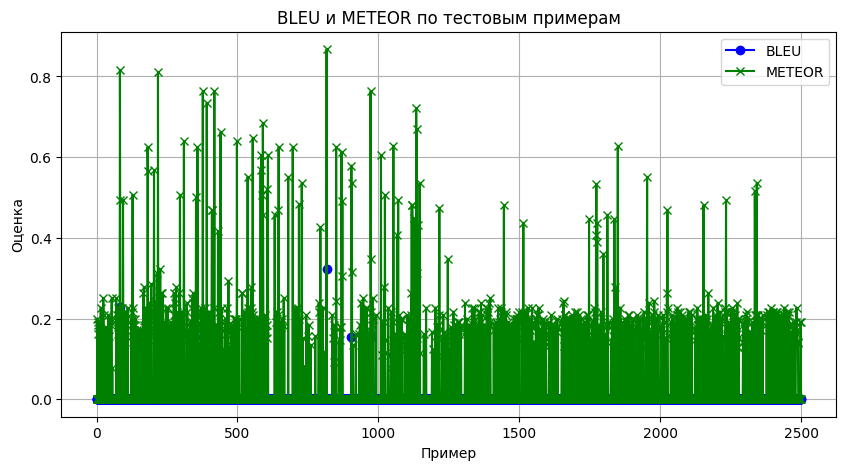

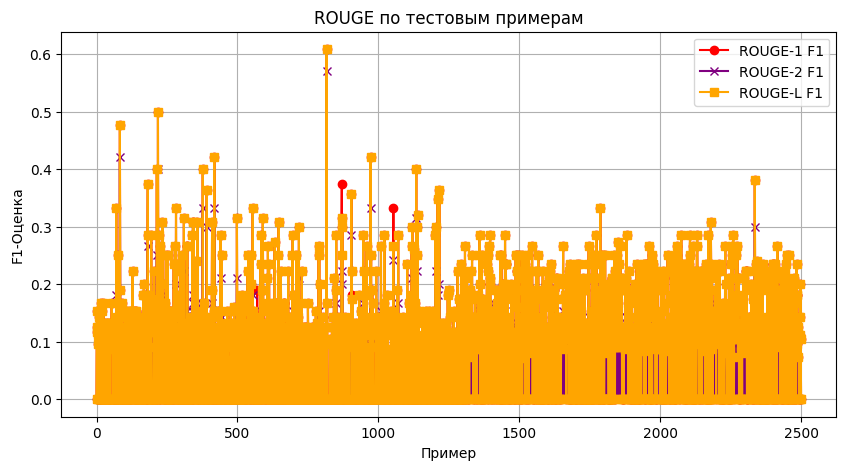

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(bleu_scores, label='BLEU', color='blue', marker='o')
plt.plot(meteor_scores, label='METEOR', color='green', marker='x')
plt.title('BLEU и METEOR по тестовым примерам')
plt.xlabel('Пример')
plt.ylabel('Оценка')
plt.legend()
plt.grid(True)
plt.savefig('charts_models\\trained_model_bleu_meteor.jpg')
plt.show()

rouge_1_f1 = [score['rouge-1']['f'] for score in rouge_scores_list]
rouge_2_f1 = [score['rouge-2']['f'] for score in rouge_scores_list]
rouge_l_f1 = [score['rouge-l']['f'] for score in rouge_scores_list]

plt.figure(figsize=(10, 5))
plt.plot(rouge_1_f1, label='ROUGE-1 F1', color='red', marker='o')
plt.plot(rouge_2_f1, label='ROUGE-2 F1', color='purple', marker='x')
plt.plot(rouge_l_f1, label='ROUGE-L F1', color='orange', marker='s')
plt.title('ROUGE по тестовым примерам')
plt.xlabel('Пример')
plt.ylabel('F1-Оценка')
plt.legend()
plt.grid(True)
plt.savefig('charts_models\\trained_model_rouge.jpg')
plt.show()

4.4.3 Вывод метрик для начальной модели

* 4.4.3.1 Подсчет метрик BLEU, ROUGE, METEOR для начальной модели модели

In [70]:
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from nltk.translate.meteor_score import meteor_score

bleu_scores = []
meteor_scores = []
rouge = Rouge()
rouge_scores_list = []

for sample_idx in range(len(dataset["test"])):
    query = dataset["test"][sample_idx]['query']    
    
    image_bytes = dataset["test"][sample_idx]['image']
    test_image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    
    prompt = f"<image>\n Question: {query} Answer:"
    
    inputs = processor(text=prompt, images=[test_image], return_tensors="pt").to("cuda")
    
    inputs['pixel_values'] = inputs['pixel_values'].to(torch.float16)
    
    generated_ids = model.generate(**inputs, max_new_tokens=12)
    generated_texts = processor.batch_decode(generated_ids, skip_special_tokens=True)
    
    ground_truth_answer = dataset["test"][sample_idx]['label']
    
    generated_tokens = generated_texts[0].split()
    ground_truth_tokens = ground_truth_answer.split()

    bleu_score = sentence_bleu([ground_truth_tokens], generated_tokens)
    print(bleu_score)
    bleu_scores.append(bleu_score)
    
    meteor = meteor_score([ground_truth_tokens], generated_tokens) 
    print(meteor)
    meteor_scores.append(meteor)
    
    rouge_scores = rouge.get_scores(' '.join(generated_tokens), ' '.join(ground_truth_tokens), avg=True)
    print(rouge_scores)
    rouge_scores_list.append(rouge_scores)

average_bleu = sum(bleu_scores) / len(bleu_scores)

average_meteor = sum(meteor_scores) / len(meteor_scores)

average_rouge = {}
for key in rouge_scores_list[0]:
    average_rouge[key] = {
        sub_key: sum(score[key][sub_key] for score in rouge_scores_list) / len(rouge_scores_list)
        for sub_key in rouge_scores_list[0][key]
    }

0
0.0
{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}
0
0.0
{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}
0
0.0
{'rouge-1': {'r': 1.0, 'p': 0.08333333333333333, 'f': 0.15384615242603553}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 1.0, 'p': 0.08333333333333333, 'f': 0.15384615242603553}}


c:\Users\artem\anaconda3\envs\chartinstruct\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\artem\anaconda3\envs\chartinstruct\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\artem\anaconda3\envs\chartinstruct\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider usi

9.788429383461836e-232
0.2380952380952381
{'rouge-1': {'r': 1.0, 'p': 0.08333333333333333, 'f': 0.15384615242603553}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 1.0, 'p': 0.08333333333333333, 'f': 0.15384615242603553}}
0
0.0
{'rouge-1': {'r': 1.0, 'p': 0.08333333333333333, 'f': 0.15384615242603553}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 1.0, 'p': 0.08333333333333333, 'f': 0.15384615242603553}}
0
0.0
{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}
0
0.0
{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}
0
0.0
{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}
0
0.0
{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}
0
0.0
{'rouge-1': {'

In [71]:
print(f"Average BLEU score: {average_bleu}")
print(f"Average METEOR score: {average_meteor}")
print(f"Average ROUGE scores: {average_rouge}")

Average BLEU score: 0.00040381913002951995
Average METEOR score: 0.042521289998417436
Average ROUGE scores: {'rouge-1': {'r': 0.29936063492063497, 'p': 0.03077244642694239, 'f': 0.05486629225296632}, 'rouge-2': {'r': 0.09125, 'p': 0.0070091091147526695, 'f': 0.012794305664878566}, 'rouge-l': {'r': 0.2990939682539682, 'p': 0.030724727128696783, 'f': 0.05479010177677584}}


* 4.4.3.1 Построение графиков для метрик BLEU, ROUGE, METEOR для начальной модели

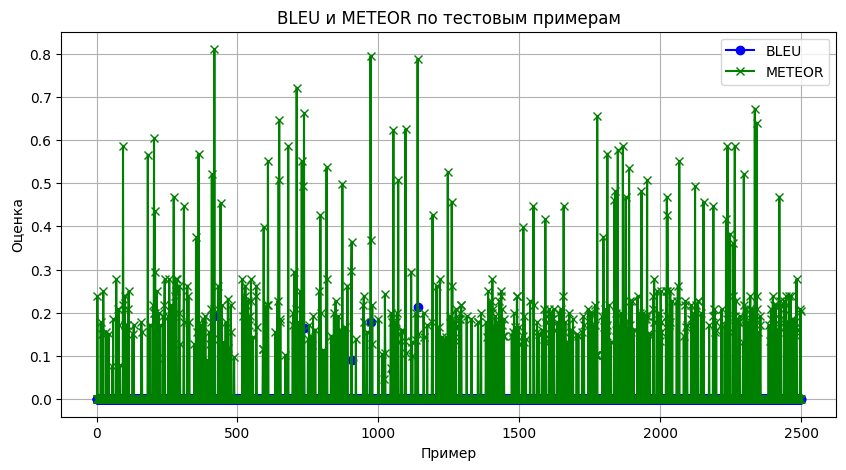

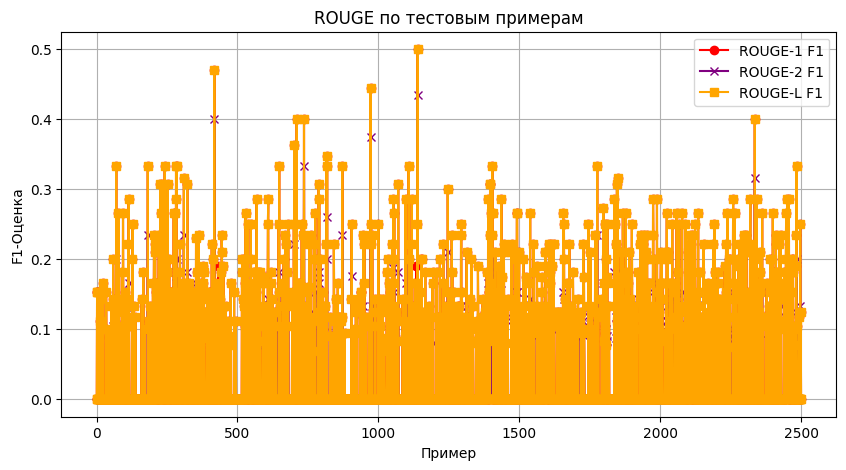

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(bleu_scores, label='BLEU', color='blue', marker='o')
plt.plot(meteor_scores, label='METEOR', color='green', marker='x')
plt.title('BLEU и METEOR по тестовым примерам')
plt.xlabel('Пример')
plt.ylabel('Оценка')
plt.legend()
plt.grid(True)
plt.savefig('charts_models\\model_bleu_meteor.jpg')
plt.show()

rouge_1_f1 = [score['rouge-1']['f'] for score in rouge_scores_list]
rouge_2_f1 = [score['rouge-2']['f'] for score in rouge_scores_list]
rouge_l_f1 = [score['rouge-l']['f'] for score in rouge_scores_list]

plt.figure(figsize=(10, 5))
plt.plot(rouge_1_f1, label='ROUGE-1 F1', color='red', marker='o')
plt.plot(rouge_2_f1, label='ROUGE-2 F1', color='purple', marker='x')
plt.plot(rouge_l_f1, label='ROUGE-L F1', color='orange', marker='s')
plt.title('ROUGE по тестовым примерам')
plt.xlabel('Пример')
plt.ylabel('F1-Оценка')
plt.legend()
plt.grid(True)
plt.savefig('charts_models\\model_rouge.jpg')
plt.show()

### **Вывод по проделанной работе и полученных метриках:**

В течение трех дней была проделана обширная работа. 

На первых этапах было дано теоретическое описание моделей VLM, необходимых для решения задач CQA (Chart Question Answering). После этого была выбрана существующая модель для решения поставленной задачи с дальнейшим дообучением на предоставленных данных. В результате было полноценно исследовано около шести моделей, которые описаны выше. Кроме того, были просмотрены и другие модели, не вошедшие в основной список.

Из-за того, что значительное время было потрачено на подбор модели, не оставалось времени на составление собственного датасета или его полную предобработку. Поэтому был выбран датасет, который отлично подходил под нашу задачу и уже имел устраивающую структуру для работы.

После успешного завершения этапов подбора модели и датасета был выполнен файнтюнинг модели, которая оказалась достаточно тяжеловесной. Дообучение на всем датасете занимало около 12 часов на одну эпоху, поэтому было принято решение сократить тренировочную выборку до 10 тысяч элементов. В результате одна эпоха стала занимать 1,5 часа.

Однако возникли трудности на этапе валидации. Валидационная выборка составляла ~1.9 тысячи элементов, и после ожидания в течение 3,5+ часов валидации после одной эпохи стало ясно, что в таких условиях не удастся уложиться в поставленные сроки. Валидационная выборка была сокращена до минимально возможного объема.

После корректного обучения модели на двух эпохах были проведены тесты на трех метриках: **BLEU**, **ROUGE** и **METEOR**. Результаты показали, что модель, подвергшаяся дообучению, имеет показатели лучше, чем модель "из коробки".

Хочу выделить, что во время валидации модели присутствовал лог, позволяющий отслеживать ответы модели на поставленные вопросы. Некоторые ответы были неверными, другие содержали всю суть ответа, но были неполными, а некоторые были точь-в-точь схожими. Чаще всего полные совпадения наблюдались, когда ответы состояли из одного слова (YES/NO) или конечной цифры.

Подводя итог, хочу отметить, что данную модель можно масштабировать и готов выдвинуть гипотезу, что она покажет приемлемые результаты. Однако для этого необходимо выделить более мощное оборудование, чем то, которым я пользовался. Во время всего обучения объем памяти GPU моей видеокарты достигал 14.6-15 ГБ, что было достаточно близко к исчерпанию памяти (out of memory).


____

## <b style="color: gray;">Благодарю за уделенное время моей работе✅〽️</b>

###### <b style="color: gray;">С уважением Rabov A.A 👩🏻‍💻</b>